In [97]:
import numpy as np
import pandas as pd
# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60) 
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import networkx as nx
from math import sqrt
SPINE_COLOR = 'gray'
%matplotlib inline
class files():
    pass

matplotlib.rcParams['figure.edgecolor'] = 'white'
matplotlib.rcParams['figure.dpi'] = 200  # figure dots per inch
matplotlib.rcParams['axes.titlesize'] = 'large' # 'large'
matplotlib.rcParams['axes.labelsize'] = 'medium' #'small' 
matplotlib.rcParams['font.family'] = 'serif'
# Set max col width to display
pd.options.display.max_colwidth = 100
import json

# Helper functions


In [217]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\\usepackage{gensymb}'],
              'axes.labelsize': 10, # fontsize for x and y labels (was 10)
              'axes.titlesize': 10,
              'font.size': 10,
              'legend.fontsize': 10, # was 10
              'xtick.labelsize': 10,
              'ytick.labelsize': 10,
              'text.usetex': False,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)
# ---------------------------------------------------------------------------

def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
def plot_series(x, ys, ax, title, maxY=None, noLegend=True, noMarker=False, 
                inTitle=None, xlabel=None, ylabel=None):
    
    for i in ys:
        if (noMarker):
            ax.plot(x, y[i], label='alpha='+str(i))
        else:
            ax.plot(x, y[i], marker='*', label='alpha='+str(i))

    if (not noLegend):
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_xlabel(xlabel)
    ax.set_xlim([0.18, 0.82])
    if (maxY is not None):
        ax.set_ylim([-5, maxY])
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if (inTitle):
        ax.text(0.8, 0.95, inTitle, transform=ax.transAxes, verticalalignment='top', ha="right",
        bbox={'facecolor':'None', 'alpha':0.5, 'pad':5})
    ax.patch.set_alpha(0.8)

def plot_scatter(x, ys, ax, title, maxY=None, noLegend=True,
                inTitle=None, xlabel=None, ylabel=None):
    
    for i in ys:
        ax.scatter(x, y[i], marker='*', label='alpha='+str(i))

    if (not noLegend):
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_xlabel(xlabel)
    ax.set_xlim([0.18, 0.82])
    if (maxY is not None):
        ax.set_ylim([-5, maxY])
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if (inTitle):
        ax.text(0.8, 0.95, inTitle, transform=ax.transAxes, verticalalignment='top', ha="right",
        bbox={'facecolor':'None', 'alpha':0.5, 'pad':5})
    ax.patch.set_alpha(0.8)
     
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
def plot_bar(dataArray, xlabels=None, ylabel=None, legendLabels=None, title=None, figsize=[8,5]):
    cmap = plt.rcParams['axes.color_cycle']
    
    N = dataArray.shape[1]
    d = dataArray.shape[0]
    shift = 0.2
    ind = np.arange(N)  # the x locations for the groups
    width = 0.25       # the width of the bars
    fig = plt.figure(1, figsize=figsize)
    ax = fig.add_subplot(111)
    
    rects = list()
    for i, data in enumerate(dataArray):
        rects.append(ax.bar(shift+ind+i*width, data, width, color=cmap[i]))

    # add some text for labels, title and axes ticks
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(shift+ind+width*d/2)
    ax.set_ylim([0, 1.1])
    ax.set_xticklabels(xlabels)

    ax.legend(rects, legendLabels)
#     ax.margins(0.05)
    
    def autolabel(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 1*height, '%.2f'%height,
                    ha='center', va='bottom')

    for rect in rects:
        autolabel(rect)
    
    return ax

# Read Data

In [119]:
with open('run_hyperopt_svm.json') as data_file:    
    data = json.load(data_file)

svm = pd.DataFrame(columns=['C', 'degree', 'gamma', 'kernel', 'type', 'results'])
for i, result in enumerate(data):
    svm.loc[i] = [result['model_params']['params']['C'],
                  result['model_params']['params']['degree'],
                  result['model_params']['params']['gamma'],
                  result['model_params']['params']['kernel'],
                  result['model_params']['type'],
                  result['result']
                 ]


In [120]:
latexify(10, 5)

# Start plots

In [134]:
svm.query("results < 1 and kernel == 'rbf'")

,C,degree,gamma,kernel,type,results
1,71.968567,1,0.000193,rbf,svm,0.078667
8,0.372759,1,71.968567,rbf,svm,0.908000
16,0.000518,1,0.000139,rbf,svm,0.912667
20,0.000268,1,13.894955,rbf,svm,0.908667
21,71.968567,1,138.949549,rbf,svm,0.908000
22,0.002683,1,0.000193,rbf,svm,0.909333
23,0.013895,1,13.894955,rbf,svm,0.907333
24,1.389495,1,0.000100,rbf,svm,0.910000
25,0.000268,1,7.196857,rbf,svm,0.906000
53,0.000193,1,0.013895,rbf,svm,0.907333


In [128]:
# 

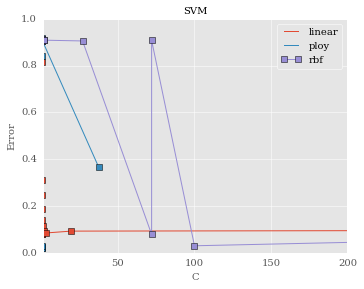

In [232]:
data = svm.query('gamma< 1').copy()

labels = ['linear', 'ploy', 'rbf']


fig = plt.figure(4, figsize=(12, 5))
fig.subplots_adjust(bottom=0.25)


dataList = []
data1= svm.query("kernel == 'linear'").copy()
dataList.append(data1)

data1= svm.query("kernel == 'poly' & degree == 4").copy()
dataList.append(data1)

data1= svm.query("kernel == 'rbf'").copy()
dataList.append(data1)

# C subplot
ax = fig.add_subplot(121)
ax.set_title("SVM")
for i,g in enumerate(dataList):
#     print(g.ix[:, 1:])
    g.sort_values(by='C', inplace=True)
    g.plot(x='C', y='results', marker='s', label=labels[i], ax=ax, legend=True)
    ax.set_ylabel("Error")
#     ax.set_ylim([])
    ax.set_xlim([1,200])

# # C subplot
# dataList = []
# dataList.append(data)

# ax = fig.add_subplot(122)
# ax.set_title("SVM poly")
# for i,g in enumerate(dataList):
# #     print(g.ix[:, 1:])
#     g.sort_values(by='C', inplace=True)
#     g.plot(x='C', y='results', marker='s', label=labels[i], ax=ax, legend=False, logx=True)
#     ax.set_ylabel("Error")
# #     ax.set_ylim([])
# #     ax.set_xlim([])
    
# Common legend
# h, l = ax.get_legend_handles_labels()
# plt.figlegend(h, l, loc='lower center',  ncol=3, bbox_to_anchor=(0.44, -0.02))

# Save output
plt.savefig('svm_C.eps', format='eps', bbox_inches='tight')


In [135]:
# 

('5', OrderedDict([('svm', {'kernel': 'poly', 'C': 0.7196856730011514, 'degree': 4, 'gamma': 51.79474679231202}), ('decisionTree', {'max_features': 'auto', 'splitter': 'best', 'max_depth': 26}), ('MLPClassifier', {'alpha': 0.1389495494373136, 'random_state': 1, 'algorithm': 'l-bfgs', 'batch_size': 500, 'hidden_layer_sizes': [25, 27]}), ('RandomForestClassifier', {'max_features': 'auto', 'n_estimators': 22, 'max_depth': 20})]))
('10', OrderedDict([('svm', {'kernel': 'poly', 'C': 0.020235896477251575, 'degree': 4, 'gamma': 6.250551925273976}), ('decisionTree', {'max_features': 'auto', 'splitter': 'best', 'max_depth': 17}), ('MLPClassifier', {'alpha': 1.6768329368110066, 'random_state': 1, 'algorithm': 'l-bfgs', 'batch_size': 500, 'hidden_layer_sizes': [28, 24]}), ('RandomForestClassifier', {'max_features': 'auto', 'max_depth': 13})]))


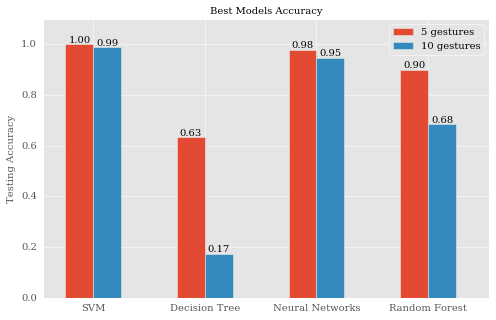

In [249]:
from collections import OrderedDict

def byteify(input):
    if isinstance(input, dict):
        return {byteify(key):byteify(value) for key,value in input.iteritems()}
    elif isinstance(input, list):
        return [byteify(element) for element in input]
    elif isinstance(input, unicode):
        return input.encode('utf-8')
    else:
        return input

with open('run_hyperOpt.json') as data_file:
    trials = json.load(data_file)

trials = byteify(trials)

bestResults = OrderedDict([('svm',10), ('decisionTree',10),  
               ('MLPClassifier',10), ('RandomForestClassifier',10)])
bestModels = OrderedDict([('svm',10), ('decisionTree',10),  
               ('MLPClassifier',10), ('RandomForestClassifier',10)])

for model in trials:
    model_type = model['model_params']['type']
    model_result = model['result']
    if model_type in bestResults:
        if model_result < bestResults[model_type]:
            bestResults[model_type] = model_result
            bestModels[model_type] = model['model_params']['params']
    else:
        bestResults[model_type] = model_result

# 5 --------------------
with open('run_hyperopt_5.json') as data_file:
    trials = json.load(data_file)

trials = byteify(trials)

bestResults_5 = OrderedDict([('svm',10), ('decisionTree',10),  
               ('MLPClassifier',10), ('RandomForestClassifier',10)])
bestModels_5 = OrderedDict([('svm',10), ('decisionTree',10),  
               ('MLPClassifier',10), ('RandomForestClassifier',10)])

for model in trials:
    model_type = model['model_params']['type']
    model_result = model['result']
    if model_type in bestResults_5:
        if model_result < bestResults_5[model_type]:
            bestResults_5[model_type] = model_result
            bestModels_5[model_type] = model['model_params']['params']
    else:
        bestResults_5[model_type] = model_result
        
# --------------------
dataLists = np.zeros((2,4))

i = 0
for key, value in bestResults_5.iteritems():
    dataLists[0, i] = 1 - value
    i += 1

i = 0
for key, value in bestResults.iteritems():
    dataLists[1, i] = 1 - value
    i += 1


modelsNames = ['SVM', 'Decision Tree', 'Neural Networks', 'Random Forest']
plot_bar(dataLists, xlabels=modelsNames, ylabel='Testing Accuracy', 
         legendLabels=['5 gestures', '10 gestures'], title="Best Models Accuracy")


print("5", bestModels_5)
print("10", bestModels)

# Save output
plt.savefig('allModels.png', format='png', bbox_inches='tight',dpi=300)


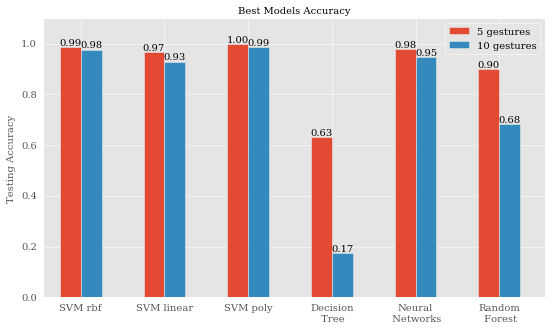

In [252]:
from collections import OrderedDict

def byteify(input):
    if isinstance(input, dict):
        return {byteify(key):byteify(value) for key,value in input.iteritems()}
    elif isinstance(input, list):
        return [byteify(element) for element in input]
    elif isinstance(input, unicode):
        return input.encode('utf-8')
    else:
        return input

with open('run_hyperOpt.json') as data_file:
    trials = json.load(data_file)

trials = byteify(trials)

bestResults = OrderedDict([('svm_rbf',10), ('svm_linear',10), ('svm_poly',10), ('decisionTree',10),  
               ('MLPClassifier',10), ('RandomForestClassifier',10)])
bestModels = OrderedDict([('svm_rbf',10), ('svm_linear',10), ('svm_poly',10), ('decisionTree',10),  
               ('MLPClassifier',10), ('RandomForestClassifier',10)])

for model in trials:
    model_type = model['model_params']['type']
    if model_type == 'svm':
        model_type = model_type + '_' + model['model_params']['params']['kernel']
    model_result = model['result']
    if model_type in bestResults:
        if model_result < bestResults[model_type]:
            bestResults[model_type] = model_result
            bestModels[model_type] = model['model_params']['params']
    else:
        bestResults[model_type] = model_result

# 5 --------------------
with open('run_hyperopt_5.json') as data_file:
    trials = json.load(data_file)

trials = byteify(trials)

bestResults_5 = OrderedDict([('svm_rbf',10), ('svm_linear',10), ('svm_poly',10), ('decisionTree',10),  
               ('MLPClassifier',10), ('RandomForestClassifier',10)])
bestModels_5 = OrderedDict([('svm_rbf',10), ('svm_linear',10), ('svm_poly',10), ('decisionTree',10),  
               ('MLPClassifier',10), ('RandomForestClassifier',10)])

for model in trials:
    model_type = model['model_params']['type']
    if model_type == 'svm':
        model_type = model_type + '_' + model['model_params']['params']['kernel']
    model_result = model['result']
    if model_type in bestResults_5:
        if model_result < bestResults_5[model_type]:
            bestResults_5[model_type] = model_result
            bestModels_5[model_type] = model['model_params']['params']
    else:
        bestResults_5[model_type] = model_result
        
# --------------------
dataLists = np.zeros((2,6))

i = 0
for key, value in bestResults_5.iteritems():
    dataLists[0, i] = 1 - value
    i += 1

i = 0
for key, value in bestResults.iteritems():
    dataLists[1, i] = 1 - value
    i += 1


modelsNames = ['SVM rbf', 'SVM linear', 'SVM poly', 'Decision\n Tree', 'Neural\n Networks', 'Random\n Forest']
plot_bar(dataLists, xlabels=modelsNames, ylabel='Testing Accuracy', 
         legendLabels=['5 gestures', '10 gestures'], title="Best Models Accuracy", figsize=[9,5])


# print("5", bestModels_5)
# print("10", bestModels)

# Save output
plt.savefig('allModels_details.png', format='png', bbox_inches='tight',dpi=300)
